### 1. Getting the system ready and loading the data

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
#Load dataset
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [5]:
#making copies
train = df_train.copy()
test = df_test.copy()

### 2. Understanding the Data

In [8]:
train.shape, test.shape

((614, 13), (367, 12))

In [6]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### 3. Univariate Analysis

In [19]:
train['Loan_Status'].value_counts(normalize=True).round(4)*100

Y    68.73
N    31.27
Name: Loan_Status, dtype: float64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

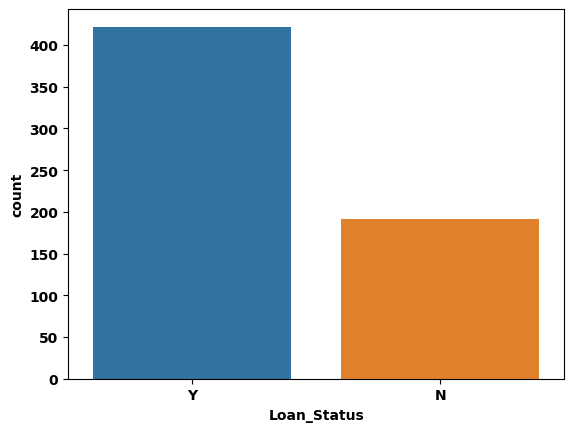

In [20]:
sns.countplot(train['Loan_Status'])

#### Independent variable (Categorical)

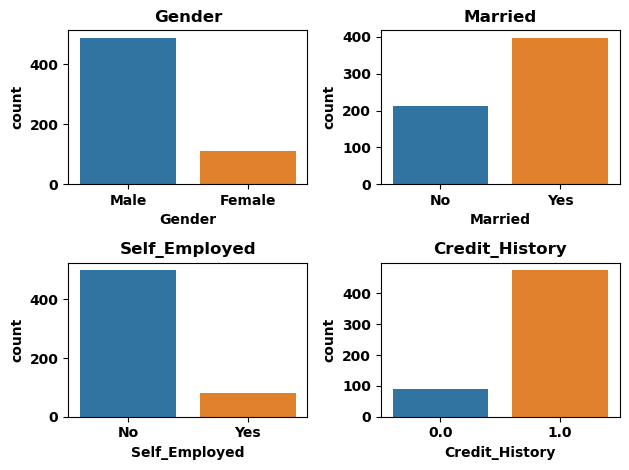

In [27]:
#Count plot
cols = ['Gender','Married','Self_Employed','Credit_History']
j = 221
for i in cols:
    plt.subplot(j)
    sns.countplot(train[i])
    plt.title(i)
    #Percentage
    #a = train[i].value_counts(normalize=True)*100
    #a.plot.bar(title=i)
    j += 1
plt.tight_layout()
plt.show()

#### Independent Variable (Ordinal)

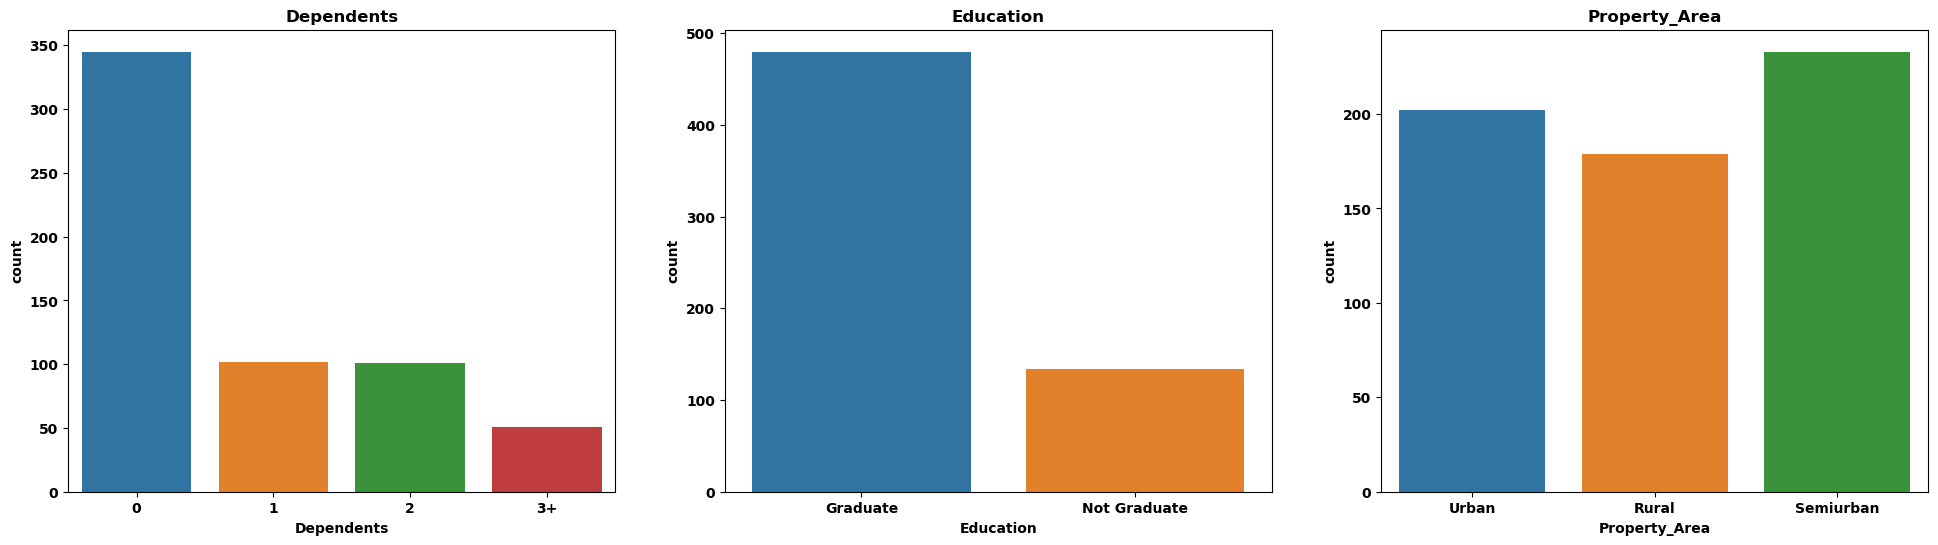

In [36]:
cols = ['Dependents','Education','Property_Area']
j = 131
plt.figure(figsize=(24,6))
for i in cols:
    plt.subplot(j)
    sns.countplot(train[i])
    plt.title(i)
    #Percentage
    #a = train[i].value_counts(normalize=True)*100
    #a.plot.bar(title=i)
    j += 1
plt.tight_layout()
plt.show()

#### Independent Variable (Numerical)

<AxesSubplot:xlabel='ApplicantIncome'>

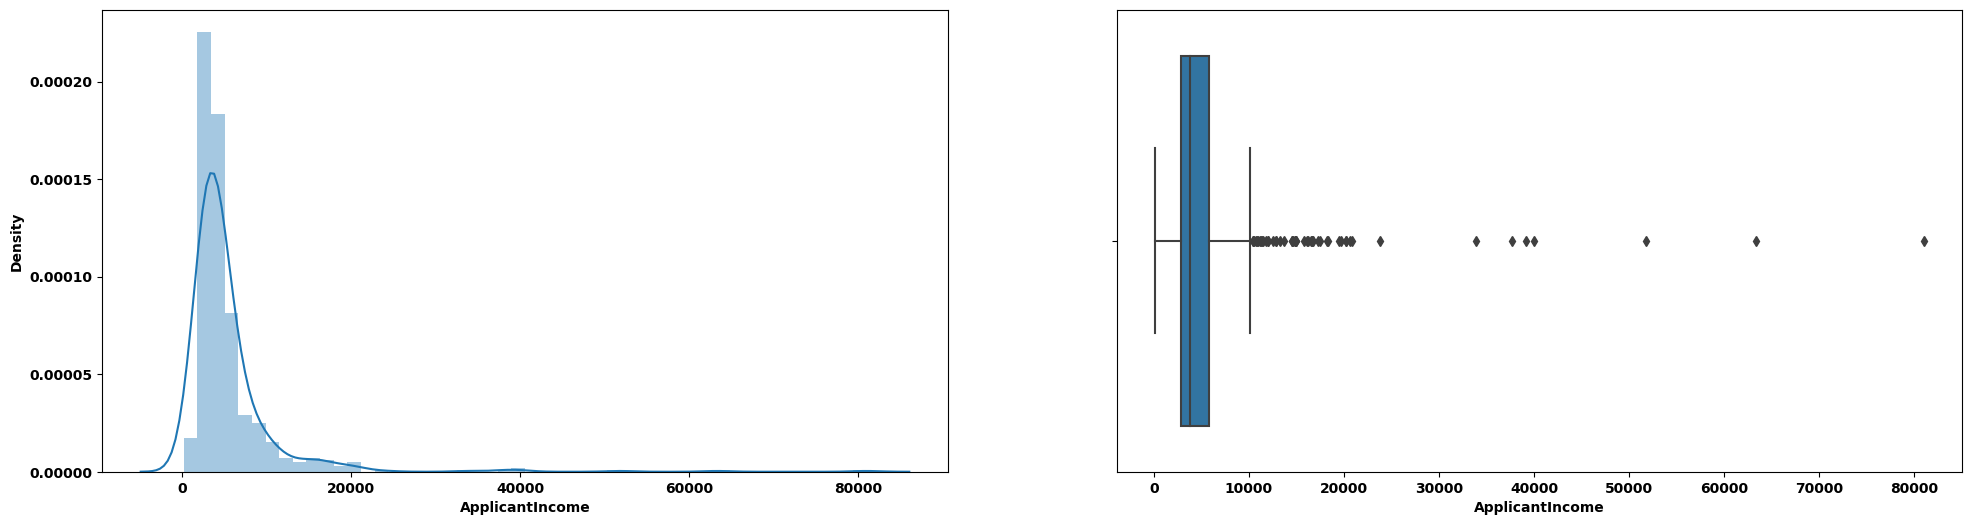

In [39]:
plt.figure(figsize=(24,6))
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])

plt.subplot(122)
sns.boxplot(train['ApplicantIncome'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Education'>

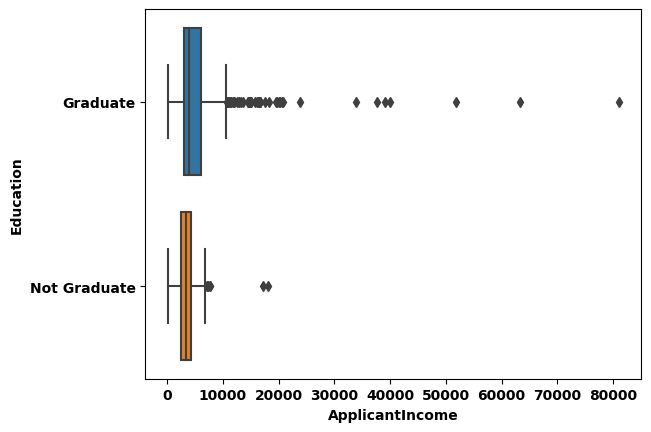

In [47]:
sns.boxplot(x = 'ApplicantIncome' , y ='Education', data = train)


<AxesSubplot:xlabel='CoapplicantIncome'>

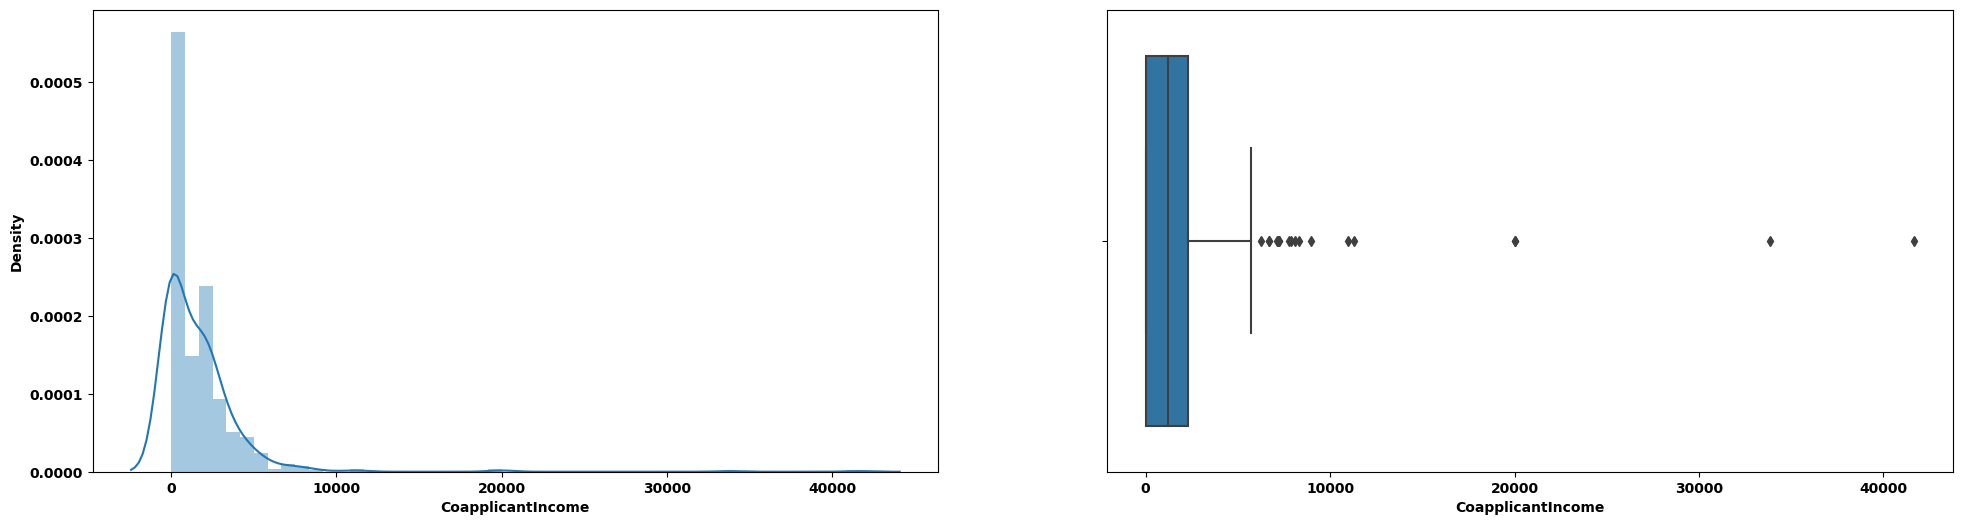

In [48]:
plt.figure(figsize=(24,6))
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])

plt.subplot(122)
sns.boxplot(train['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount'>

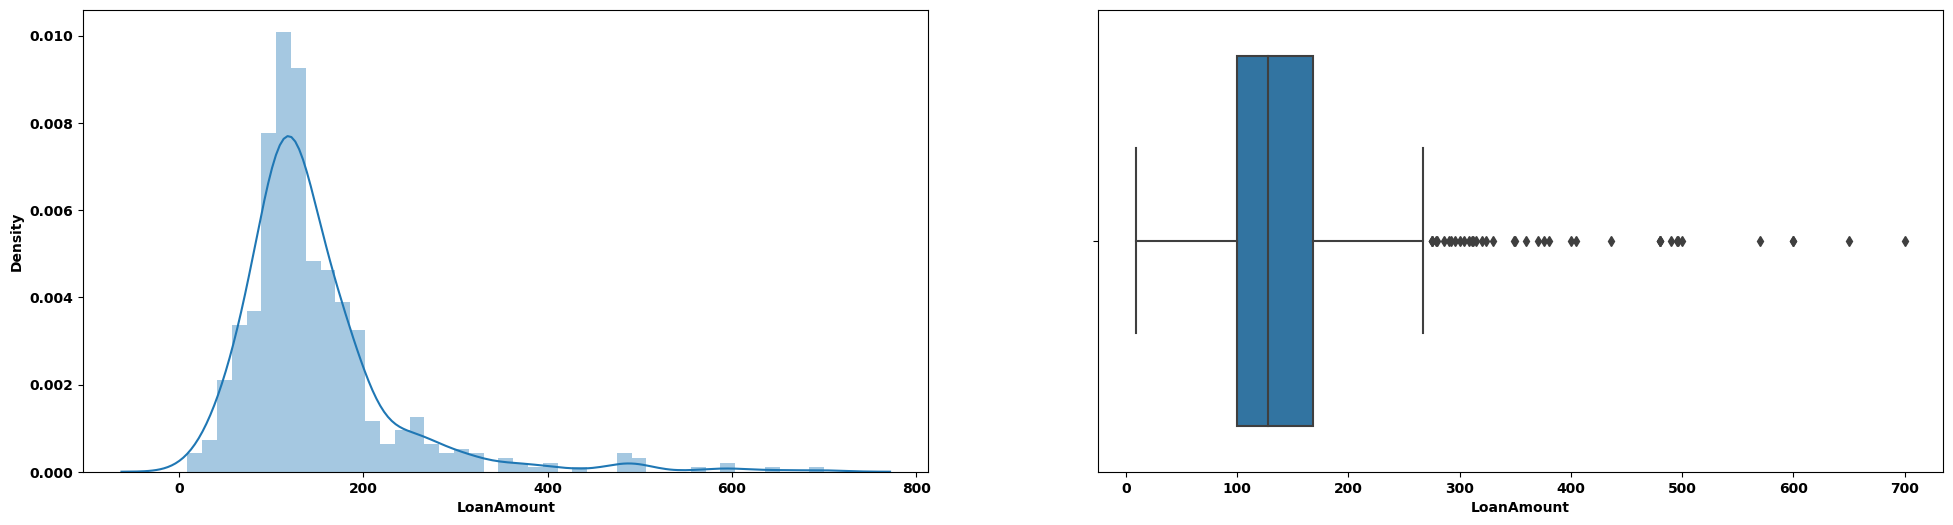

In [49]:
plt.figure(figsize=(24,6))
plt.subplot(121)
sns.distplot(train['LoanAmount'])

plt.subplot(122)
sns.boxplot(train['LoanAmount'])

### 4. Bivariate Analysis

#### Categorical Independent Variable vs Target Variable

<AxesSubplot:xlabel='Gender', ylabel='count'>

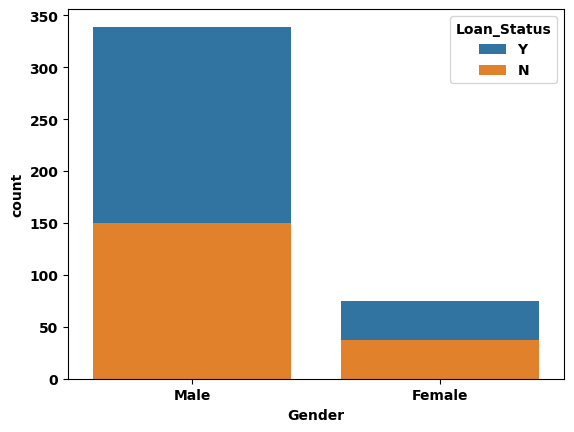

In [52]:
#sns.countplot(x='Gender', hue = 'Loan_Status', data=train, dodge=False)

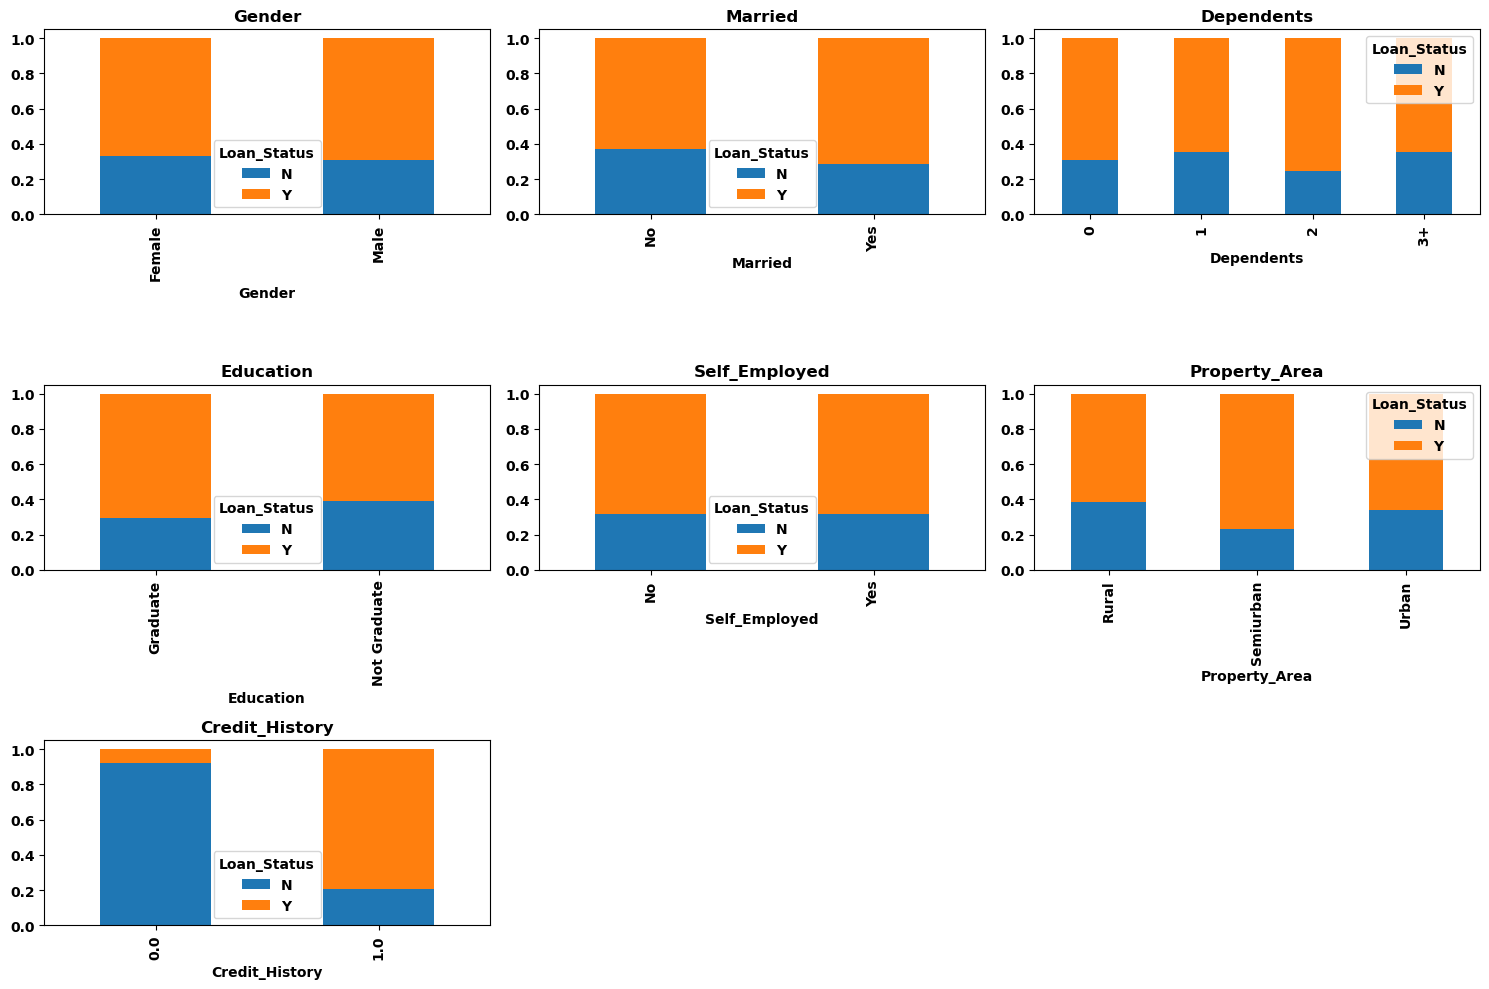

In [84]:
import matplotlib.pyplot as plt
import pandas as pd

cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History']
j = 331
plt.figure(figsize=(15, 10))

for i in cols:
    plt.subplot(j)
    temp = pd.crosstab(train[i], train['Loan_Status'])
    temp.div(temp.sum(axis=1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(i)
    j += 1

plt.tight_layout()
plt.show()


#### Numberical Independent Variable vs Target Variable

<AxesSubplot:xlabel='Loan_Status'>

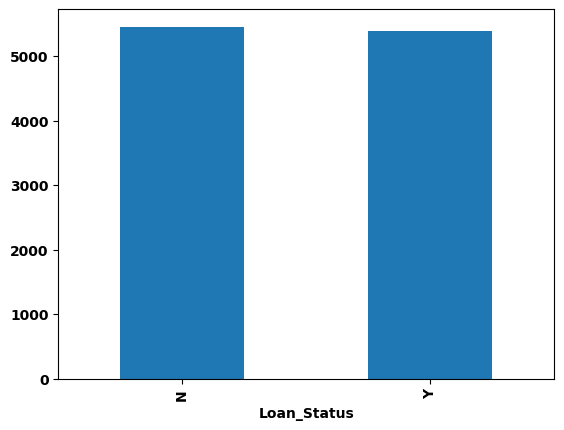

In [86]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [98]:
#Binning
train['Income_bin'] = pd.cut(train['ApplicantIncome'], bins=[0,2500,4000,6000,81000], labels=['Low','Average','High','Very High'])
train['Co_bin'] = pd.cut(train['CoapplicantIncome'], bins=[0,1000,3000,42000], labels=['Low','Average','High'])
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train['Total_Income_bin'] = pd.cut(train['Total_Income'], bins=[0,2500,4000,6000,81000], labels=['Low','Average','High','Very High'])
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'], bins=[0,100,200,700], labels=['Low','Average','High'])

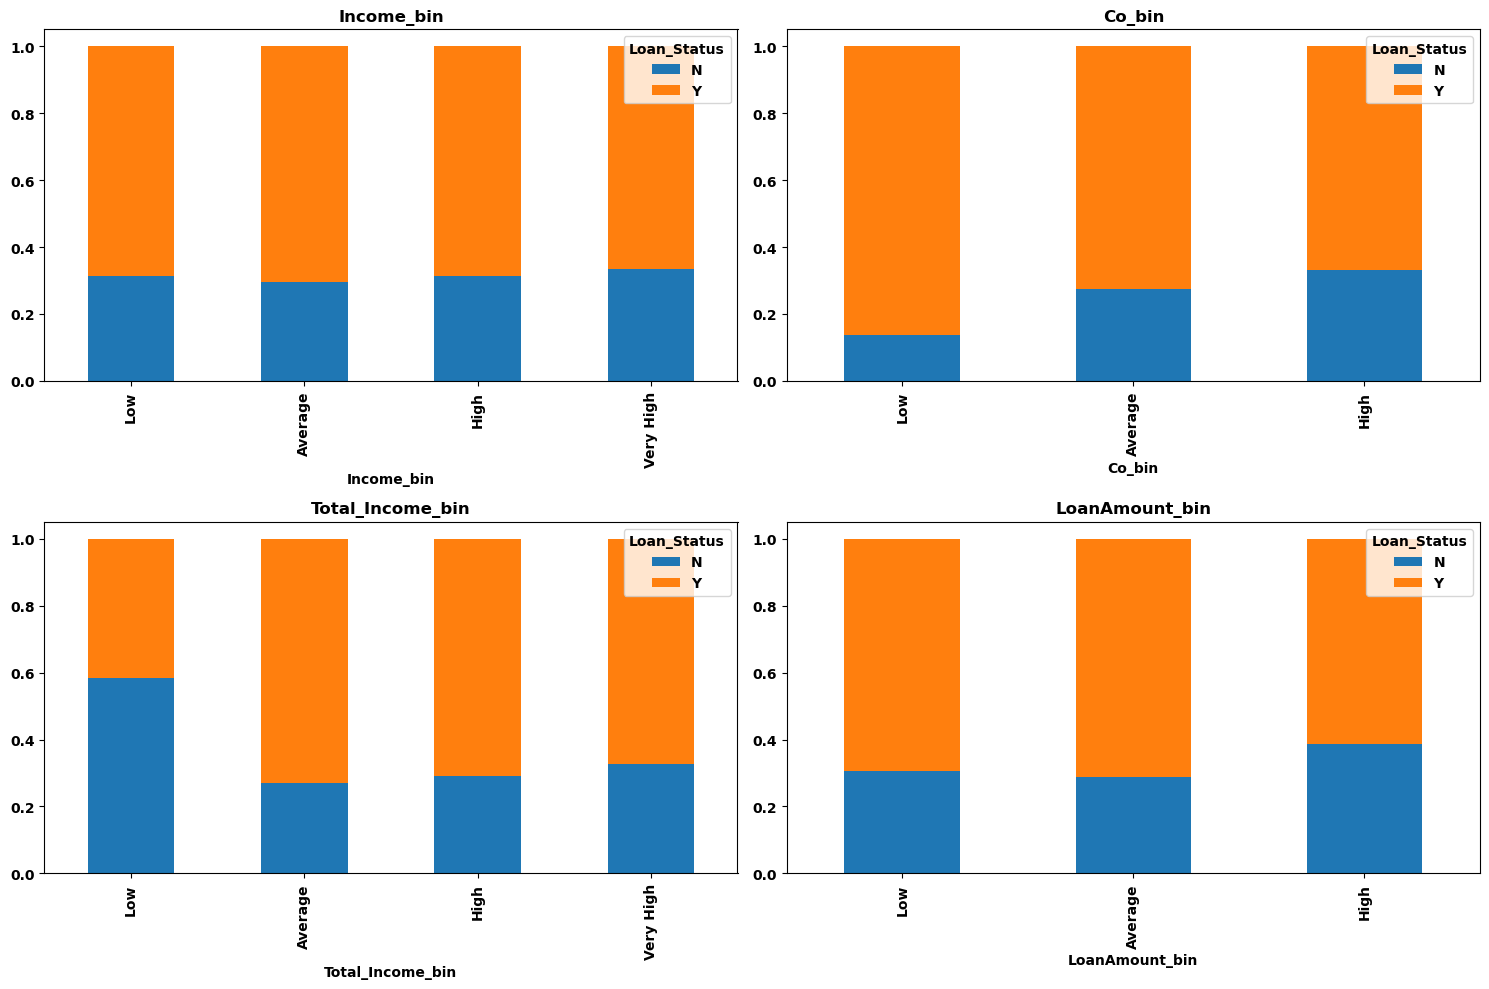

In [100]:
cols = ['Income_bin','Co_bin','Total_Income_bin','LoanAmount_bin']
j = 221
plt.figure(figsize=(15, 10))

for i in cols:
    plt.subplot(j)
    temp = pd.crosstab(train[i], train['Loan_Status'])
    temp.div(temp.sum(axis=1).astype(float),axis=0).plot(kind='bar',stacked = True, ax=plt.gca())
    plt.title(i)
    j += 1
plt.tight_layout()
plt.show()

In [101]:
#Dropping the bin variable
train = train.drop(['Income_bin','Co_bin','Total_Income','Total_Income_bin','LoanAmount_bin'], axis=1)

In [161]:
#Replacing the values
train['Dependents'] = train['Dependents'].replace('3+', 3)
test['Dependents'] = test['Dependents'].replace('3+', 3)
train['Loan_Status'] = train['Loan_Status'].map({'N':0, 'Y':1}) 


<AxesSubplot:>

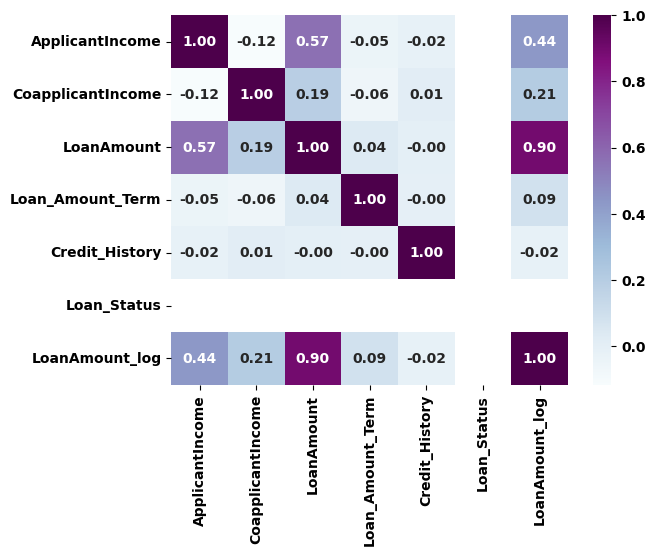

In [162]:
sns.heatmap(train.corr(), annot=True, cmap='BuPu', fmt='.2f')

### 5. Missing Value and Outlier Treatment

In [163]:
train.isnull().sum().sort_values(ascending=False)

Loan_Status          614
Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
LoanAmount_log         0
dtype: int64

In [164]:
test.isnull().sum().sort_values(ascending=False)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       0
dtype: int64

In [165]:
#Missing value treatment
#Categorical
cols = ['Gender','Married','Dependents','Self_Employed','Credit_History','Loan_Amount_Term']

for i in cols:
    train[i] = train[i].fillna(train[i].mode()[0])
    test[i] = test[i].fillna(train[i].mode()[0])

#Numerical
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].median())
test['LoanAmount'] = test['LoanAmount'].fillna(train['LoanAmount'].median())

In [166]:
test.isnull().sum().sort_values(ascending=False)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       0
dtype: int64

<AxesSubplot:xlabel='LoanAmount_log', ylabel='Count'>

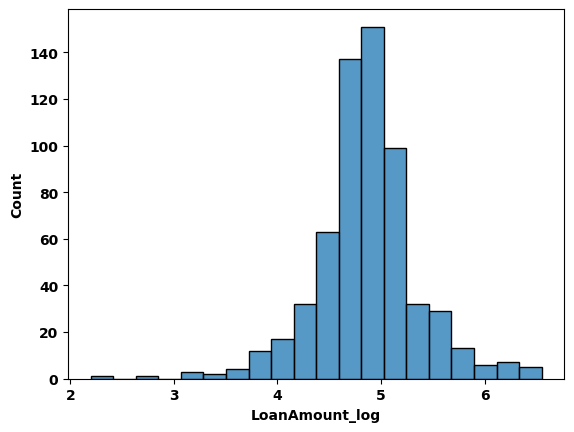

In [167]:
#Outlier Treatment
train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])
sns.histplot(train['LoanAmount_log'], bins=20)

### 6. Model Building

In [242]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score, recall_score, precision_score

In [245]:
#Independed and dependent variable
x = train.drop(['Loan_Status','Loan_ID','LoanAmount'], axis=1)
y = train['Loan_Status'].map({'Y':1, 'N':0})

In [246]:
#Changing the categorical variable to 
x['Dependents'] = x['Dependents'].astype(float)
x['Education'] = x['Education'].map({'Graduate':1, 'Not Graduate':0})
x['Loan_Amount_Term'] = x['Loan_Amount_Term'].astype(float)/12
x['Property_Area'] = x['Property_Area'].map({'Rural':0, 'Semiurban':1 ,'Urban':2})

dum = pd.get_dummies(x[['Gender','Married','Self_Employed']])
x = x.drop(['Gender','Married','Self_Employed'],axis=1)
x = pd.concat([x,dum], axis=1)

In [247]:
#split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [248]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
train_acc = accuracy_score(y_train, model.predict(x_train)).round(2)
test_acc = accuracy_score(y_test, y_pred).round(2)
print('Train Accuracy: {} \n Test Accuracy: {}'.format(train_acc,test_acc))

Train Accuracy: 0.83 
 Test Accuracy: 0.78


In [249]:
def cv_score(ml_model, thres = 0.5, cols = x.columns):
    i = 1
    cv_scores = []
    df1 = x.copy()
    df1 = df1[cols]
    
    # 5 Fold cross validation stratified on the basis of target
    kf = StratifiedKFold(n_splits=5,random_state=12,shuffle=True)
    for df_index,test_index in kf.split(df1,y):
        print('\n{} of kfold {}'.format(i,kf.n_splits))
        xtr,xvl = df1.loc[df_index],df1.loc[test_index]
        ytr,yvl = y.loc[df_index],y.loc[test_index]
            
        # Define model for fitting on the training set for each fold
        model = ml_model
        model.fit(xtr, ytr)
        pred_probs = model.predict_proba(xvl)
        pp = []
         
        # Use threshold to define the classes based on probability values
        for j in pred_probs[:,1]:
            if j>thres:
                pp.append(1)
            else:
                pp.append(0)
         
        # Calculate scores for each fold and print
        pred_val = pp
        roc_score = roc_auc_score(yvl,pred_probs[:,1])
        recall = recall_score(yvl,pred_val)
        precision = precision_score(yvl,pred_val)
        sufix = ""
        msg = ""
        msg += "ROC AUC Score: {}, Recall Score: {:.4f}, Precision Score: {:.4f} ".format(roc_score, recall,precision)
        print("{}".format(msg))
         
         # Save scores
        cv_scores.append(roc_score)
        i+=1
    return cv_scores

In [250]:
all_feat_scores = cv_score(LogisticRegression() )


1 of kfold 5
ROC AUC Score: 0.804953560371517, Recall Score: 0.9765, Precision Score: 0.8300 

2 of kfold 5
ROC AUC Score: 0.7065015479876161, Recall Score: 0.9647, Precision Score: 0.7736 

3 of kfold 5
ROC AUC Score: 0.6770451770451771, Recall Score: 0.9643, Precision Score: 0.7788 

4 of kfold 5
ROC AUC Score: 0.7246642246642246, Recall Score: 1.0000, Precision Score: 0.7778 

5 of kfold 5
ROC AUC Score: 0.7493734335839599, Recall Score: 0.9881, Precision Score: 0.7981 
